In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math
from sklearn.metrics import mean_squared_error
from statistics import mean
from scipy.linalg import svd
from scipy.linalg import eig
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import cm
import datetime

In [10]:
sns.set_style('whitegrid') 
color = sns.color_palette()

In [ ]:
df = pd.read_csv('../dataset/AFFR_data_sorted.csv')
df['Time'] = pd.to_datetime(df['Time'], unit='s')
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,2011-04-27,Good Quality Dog Food,bought sever vital dog food product found good...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,2012-09-07,Not as Advertised,product arriv label jumbo salt peanut peanut a...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,2008-08-18,"""Delight"" says it all",confect around centuri light pillowi citrus ge...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,2011-06-13,Cough Medicine,look secret ingredi robitussin believ found go...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,2012-10-21,Great taffy,great taffi great price wide assort yummi taff...
...,...,...,...,...,...,...,...,...,...,...
393635,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,2011-03-09,Will not do without,great sesam chicken good better restur eaten h...
393636,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,2012-03-09,disappointed,disappoint flavor chocol note especi weak milk...
393637,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,2012-02-21,Perfect for our maltipoo,star small give 10 15 one train session tri tr...
393638,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,2012-03-13,Favorite Training and reward treat,best treat train reward dog good groom lower c...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393640 entries, 0 to 393639
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      393640 non-null  int64         
 1   ProductId               393640 non-null  object        
 2   UserId                  393640 non-null  object        
 3   ProfileName             393629 non-null  object        
 4   HelpfulnessNumerator    393640 non-null  int64         
 5   HelpfulnessDenominator  393640 non-null  int64         
 6   Score                   393640 non-null  int64         
 7   Time                    393640 non-null  datetime64[ns]
 8   Summary                 393637 non-null  object        
 9   Text                    393640 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(5)
memory usage: 30.0+ MB


# Exploratory Data Analysis

## Distribution of Score

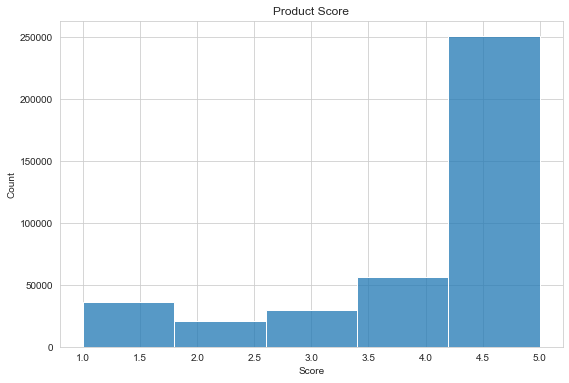

In [ ]:
plt.figure(figsize=(9,6))
sns.histplot(df, x='Score', stat='count', bins=5)
plt.title('Product Score')
plt.show()

## Review trend for each year

In [ ]:
sections = np.sort(df['Time'].dt.strftime('%Y-%m').unique())
sections

array(['1999-10', '1999-12', '2000-01', '2000-02', '2000-06', '2000-07',
       '2000-08', '2000-10', '2000-12', '2001-02', '2001-05', '2001-06',
       '2001-08', '2001-09', '2001-10', '2001-12', '2002-01', '2002-02',
       '2002-03', '2002-04', '2002-05', '2002-06', '2002-07', '2002-08',
       '2002-09', '2002-10', '2002-11', '2002-12', '2003-01', '2003-02',
       '2003-05', '2003-06', '2003-07', '2003-09', '2003-10', '2003-11',
       '2003-12', '2004-01', '2004-02', '2004-03', '2004-04', '2004-05',
       '2004-06', '2004-07', '2004-08', '2004-09', '2004-10', '2004-11',
       '2004-12', '2005-01', '2005-02', '2005-03', '2005-04', '2005-05',
       '2005-06', '2005-07', '2005-08', '2005-09', '2005-10', '2005-11',
       '2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05',
       '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11',
       '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05',
       '2007-06', '2007-07', '2007-08', '2007-09', 

In [ ]:
def countTimeReviews (score, i):
    t1 = df[df['Score']==score]['Time'].dt.strftime('%Y-%m') < sections[i+1]
    t2 = df[df['Score']==score]['Time'].dt.strftime('%Y-%m') > sections[i]
    time_df = t1 & t2
    return time_df.sum()

In [ ]:
year_count = np.zeros((len(sections)-1)*5).reshape(5,(len(sections)-1))

for i in range(len(sections)-1):
    year_count[0][i] += countTimeReviews(1,i)
    year_count[1][i] += countTimeReviews(2,i)
    year_count[2][i] += countTimeReviews(3,i)
    year_count[3][i] += countTimeReviews(4,i)
    year_count[4][i] += countTimeReviews(5,i)

pd.DataFrame(year_count)

,0,1,2,3,4,5,6,7,8,9,...,132,133,134,135,136,137,138,139,140,141
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1476.0,1583.0,1309.0,1383.0,1277.0,1325.0,1321.0,1397.0,1369.0,1653.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,720.0,832.0,732.0,783.0,706.0,718.0,710.0,796.0,832.0,853.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,974.0,1040.0,1018.0,1087.0,972.0,987.0,1107.0,1128.0,1079.0,1119.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1725.0,1919.0,1873.0,1924.0,1778.0,1925.0,1973.0,2130.0,2084.0,1923.0
4,2.0,2.0,3.0,0.0,4.0,1.0,3.0,1.0,3.0,1.0,...,8083.0,9075.0,7700.0,7889.0,7486.0,7639.0,7518.0,8749.0,8610.0,9380.0


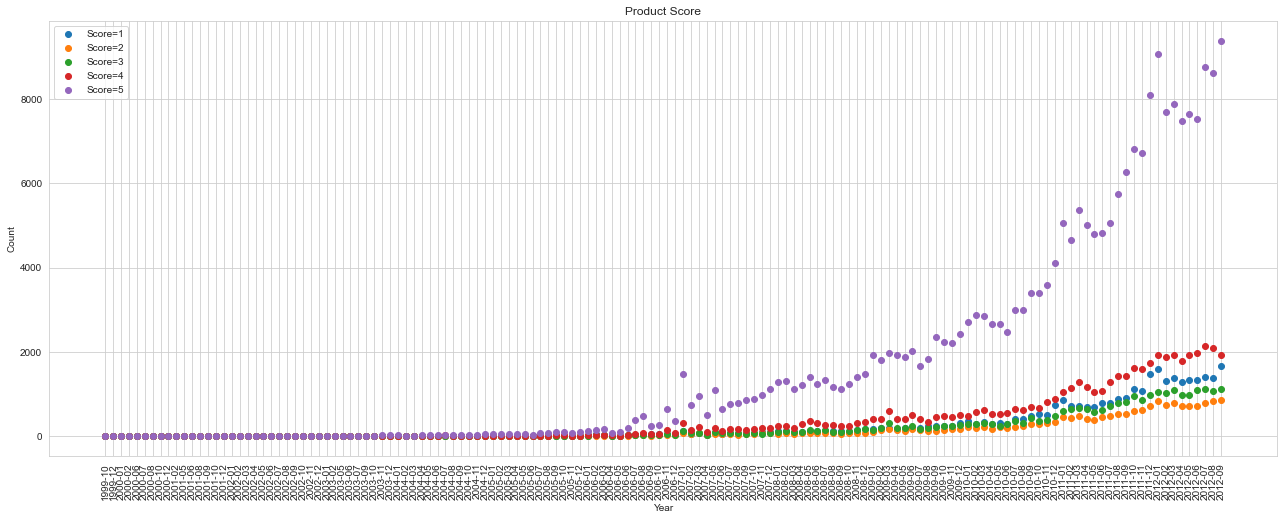

In [ ]:
plt.figure(figsize=(22,8))
for i in range(5):
    # plt.scatter(time_intervals, year_count[i], label='Score='+str(i+1))
    plt.scatter(sections[:len(sections)-1], year_count[i], label='Score='+str(i+1))
plt.title('Product Score')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

________
We will consider all reviews with scores > 3 as positve and reviews with score < 3 as negative. When score equals 3, we will consider the review to be neutral. 
________

## Distribution of positve, negative and neutral reviews

In [ ]:
count_p = df[con]

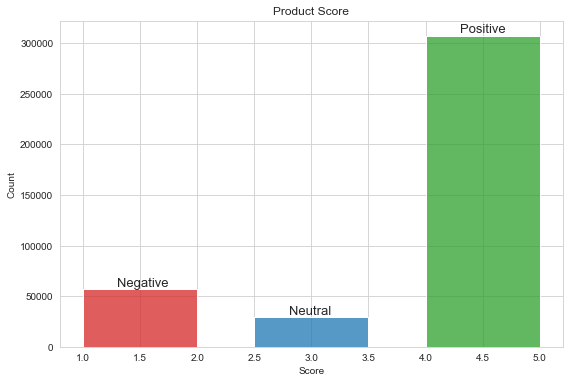

In [ ]:
plt.figure(figsize=(9,6))
sns.histplot(df[df['Score']>3], x='Score', stat='count', bins=1, color='tab:green')
sns.histplot(df[df['Score']==3], x='Score', stat='count', bins=1, color='tab:blue')
sns.histplot(df[df['Score']<3], x='Score', stat='count', bins=1, color='tab:red')
plt.text(4.3, 310000, 'Positive', fontsize=13)
plt.text(2.8, 31500, 'Neutral', fontsize=13)
plt.text(1.3, 60000, 'Negative', fontsize=13)
plt.title('Product Score')
plt.show()

Here we can see that we have more samples for _Positive_ than for _Negative_ or _Neutral_ case. Due to this imbalance, we cannot be assured of the accuracy of the trained model.

## Understanding user data

In [ ]:
df['UserId'].value_counts().describe()

count    256055.000000
mean          1.537326
std           2.732791
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         329.000000
Name: UserId, dtype: float64

We see that on an average, most users bought the product only once. 

## Creating wordclouds

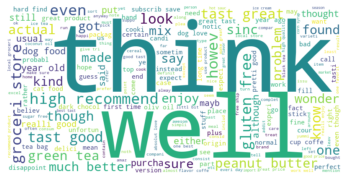

In [13]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
textt = " ".join(review for review in df.Text)
wordcloud = WordCloud(height=400,
                      width=800,
                      background_color ='white', 
                      stopwords=stopwords).generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()